In [ ]:
## 随机森林

## 树的数量（n_estimators）选择

关于树的数量（n_estimators）的选择，过多的树可能导致过拟合，而过少的树可能无法发挥随机森林的优势。壮哥你觉得怎样才能选择适当的树的数量呢？

一个重要的超参数是n_estimators，也就是决定森林中树的数量。

这个问题涉及到过拟合和模型性能之间的平衡这两方面的内容。

a. 过拟合

过多的树可能导致模型过拟合，即在训练数据上表现得很好，但在未见过的数据上表现不佳。
随机森林的基本思想是通过多个弱学习器的集成来提高模型的泛化能力，但过多的树可能使得模型过于复杂，过分拟合了训练数据的噪声。
b. 模型性能

过少的树可能无法发挥随机森林的优势，因为模型的泛化能力可能不够强大，无法捕捉数据中的复杂关系。
选择适当的树的数量，涉及到调参的方法有 2 个：

网格搜索（Grid Search）： 通过在一个预定义的范围内尝试不同的树的数量，结合交叉验证，选择性能最好的参数组合。
随机搜索（Random Search）： 在参数空间中随机选择一组参数进行尝试，也结合交叉验证来评估性能。
还有一些关键需要注意的点：

观察学习曲线： 绘制随着树的数量增加，模型在训练集和验证集上的性能曲线。学习曲线可以帮助判断模型是否过拟合或欠拟合。
Out-of-Bag（OOB）误差： 随机森林中的每棵树都是使用部分样本训练的，未被使用的样本可以用来评估模型的性能。观察随着树的数量增加，OOB误差是否趋于稳定。

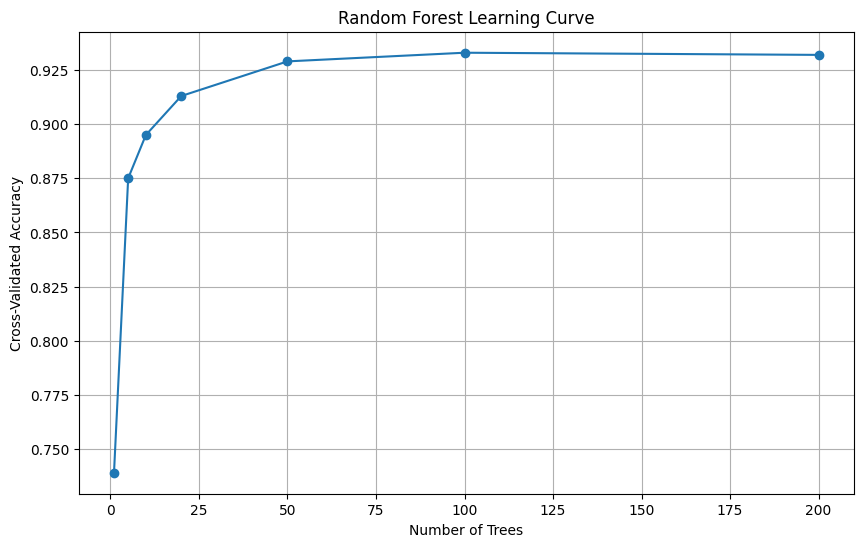

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

# 生成随机数据集
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=2, random_state=42)

# 初始化树的数量列表
n_estimators_list = [1, 5, 10, 20, 50, 100, 200]

# 存储交叉验证分数的列表
cv_scores = []

# 通过不同的树的数量进行交叉验证
for n_estimators in n_estimators_list:
    # 初始化随机森林分类器
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    #---------------------------------------------------------------------------
    # 进行交叉验证并记录分数
    # cv	交叉验证时迭代次数
    # https://blog.csdn.net/worther/article/details/126909270  (sklearn交叉验证函数cross_val_score用法及参数解释)
    #---------------------------------------------------------------------------
    scores = cross_val_score(rf_classifier, X, y, cv=5)
    cv_scores.append(np.mean(scores))

# 绘制学习曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, cv_scores, marker='o')
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

## 树的深度（max_depth）

对于树的深度max_depth，过深的树可能过拟合，而太浅的树可能不够拟合数据。你有什么建议来选择适当的深度吗？

关于决策树的深度选择，非常常见。我们通常希望找到一个平衡点，既不过拟合也不欠拟合。

这涉及到调整决策树模型的超参数，其中最主要的就是max_depth，即树的最大深度。

需要知道的一点是，决策树的深度是指树的层数，每一层代表一个决策。深度越深，模型就越复杂，能够更好地捕捉训练数据的细节，但也更容易过拟合。

这里给出2种方法，你可以作为参考：

通过交叉验证来选择合适的max_depth，在训练集上训练模型，然后在验证集上评估性能。不同的深度可能导致不同的模型性能，我们可以选择在验证集上表现最好的深度。

画出学习曲线，观察随着深度的增加，模型在训练集和验证集上的表现。找到一个平衡点，使得模型既能够很好地拟合训练数据，又能够泛化到未见过的数据。

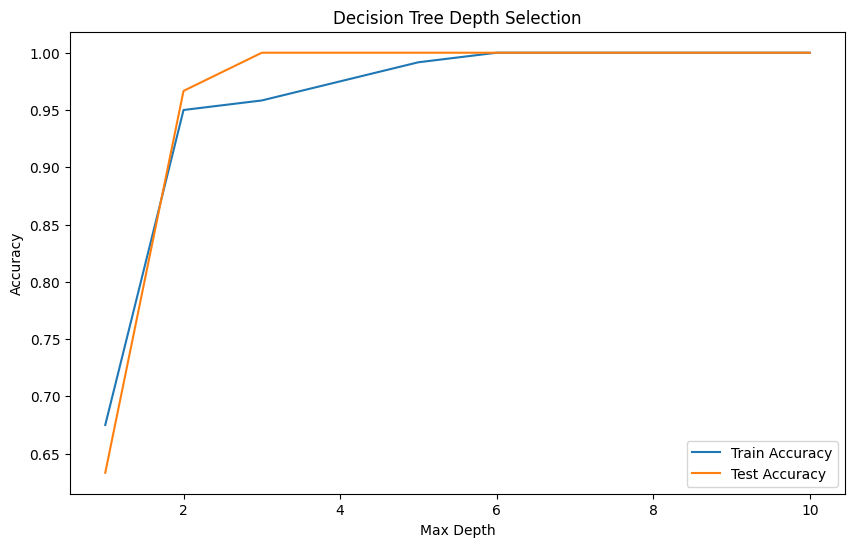

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 定义不同深度的范围
depth_range = np.arange(1, 11)

# 存储训练集和验证集上的准确度
train_accuracy = []
test_accuracy = []

# 遍历不同深度
for depth in depth_range:
    # 创建决策树模型
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # 在训练集上训练模型
    model.fit(X_train, y_train)

    # 记录训练集和验证集上的准确度
    train_accuracy.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test)))

# 画出学习曲线
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracy, label='Train Accuracy')
plt.plot(depth_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Selection')
plt.legend()
plt.show()

过于追求训练集上的准确度可能导致模型在验证集上过拟合。因此，始终通过验证集来评估模型的性能。

可以考虑结合其他超参数调整，如min_samples_split和min_samples_leaf等，以进一步优化模型的泛化性能

## 特征子集的选择

壮哥好，关于特征子集的选择，随机森林在每个节点上选择一个随机的特征子集进行分裂，这有助于增加模型的多样性。但是，我不太明白如何通过参数来控制特征子集的大小，看方便抽空帮我解释一下吗？

你好，关于随机森林中特征子集的选择，参数控制的主要工具是max_features。max_features参数指定了在每个节点上用于分裂的特征子集的大小。

在随机森林中，每个决策树的构建过程都会使用一个随机选择的特征子集来进行分裂，这有助于提高模型的多样性，减少过拟合。

具体来说，max_features可以被设置为以下几种方式，咱们详细说说~




1. 整数值： 如果max_features是整数，则每个节点在分裂时都会随机选择该数量的特征进行考虑。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 设置max_features为整数值，例如5
rf = RandomForestClassifier(max_features=5)

2. 浮点数： 如果max_features是浮点数（0到1之间），则它表示特征的百分比。在每个节点，算法将使用总特征数乘以该百分比的特征

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 设置max_features为浮点数，例如0.8表示80%的特征
rf = RandomForestClassifier(max_features=0.8)

3. 字符串： 特定字符串值也可以用于控制特征子集的选择。例如，'sqrt'表示使用总特征数的平方根，'log2'表示使用总特征数的对数。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 设置max_features为字符串，例如'sqrt'或'log2'
rf = RandomForestClassifier(max_features='sqrt')

4. None： 如果max_features是None（默认值），则每个节点考虑所有特征进行分裂。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 不设置max_features或设置为None
rf = RandomForestClassifier(max_features=None)

通过调整max_features，你可以控制每个节点的特征子集大小，从而影响随机森林的多样性和性能。在实际应用中，可以通过交叉验证等方法来调整max_features以找到最佳的取值。

## 样本不平衡问题

如果数据集中的类别分布不平衡，随机森林可能对样本更多的类别更为敏感。壮哥你有什么建议来处理样本不平衡问题吗？

你好，样本不平衡问题，对于随机森林来说，由于它是基于树的集成方法，当类别分布不平衡时，模型可能更偏向于预测样本更多的类别。

咱们大概分几点来说明处理样本不平衡问题，你可以作为参考：

1. 重采样：

过采样：增加样本较少的类别的样本数量，可以使用方法如 SMOTE 来生成合成样本。
欠采样：减少样本较多的类别的样本数量，可以通过随机删除一些样本或者使用集成学习方法，如EasyEnsemble和BalanceCascade等。

2. 权重调整：

在训练过程中，通过给予样本权重，使得模型更关注样本较少的类别。在随机森林中，可以通过设置class_weight参数来实现，通常设置为balanced。

3. 引入其他评估指标：

使用其他评估指标来衡量模型性能，如精确度、召回率、F1分数等，而不仅仅是准确度（Accuracy）。

4. 使用不同的决策阈值：

调整分类的决策阈值，使得模型更倾向于将样本划分为少数类别。可以通过ROC曲线和Precision-Recall曲线来选择合适的阈值。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器并设置类别权重
clf = RandomForestClassifier(class_weight='balanced')

# 获取模型预测的概率
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# 自定义阈值
threshold = 0.5

# 根据阈值调整预测结果
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

5. 集成方法：

使用集成学习方法，如EasyEnsemble、BalanceCascade等，来构建多个子模型，每个子模型都在平衡的数据集上进行训练。

## 随机种子的设置

设置随机种子的问题我有点困惑，为了保证结果的可重复性，应该怎样设置随机种子呢？

在机器学习中，随机性常常是不可避免的，例如在数据集划分、模型初始化、参数优化等过程中会涉及到随机性。为了确保实验结果的可重复性，设置随机种子是一种常见的做法。

In [ ]:
import torch
import numpy as np

# 设置PyTorch随机种子
torch.manual_seed(42)

# 设置Numpy随机种子（某些情况下可能需要）
np.random.seed(42)

这样设置之后，每次运行代码时，相同的随机操作将产生相同的结果。

说几点要非常注意的事项：

随机性来源： 在机器学习中，随机性通常来自于数据集的洗牌（shuffling）、模型参数的初始化、优化算法中的随机梯度下降等。

1. PyTorch中的随机性： PyTorch使用随机数生成器来处理随机性。通过设置PyTorch的随机种子，可以确保训练过程中的随机性受到控制。

2. Numpy随机种子： 在一些情况下，涉及到Numpy的随机操作（例如数据预处理）时，也需要设置Numpy的随机种子以确保一致性。

3. 不同环境的影响： 在分布式训练、GPU加速等情况下，随机性可能受到不同环境的影响。在这种情况下，还需要考虑其他因素，例如CUDA的随机种子设置。

4. 完整性和复现性： 设置随机种子有助于实验结果的完整性和复现性，但不是绝对的保证。一些操作（例如CUDA加速）可能仍然引入一些随机性。

100%|██████████| 9912422/9912422 [00:00<00:00, 91872106.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33151530.88it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26159894.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3581599.69it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.6058
Epoch [2/5], Loss: 0.3869
Epoch [3/5], Loss: 0.3527
Epoch [4/5], Loss: 0.3351
Epoch [5/5], Loss: 0.3242


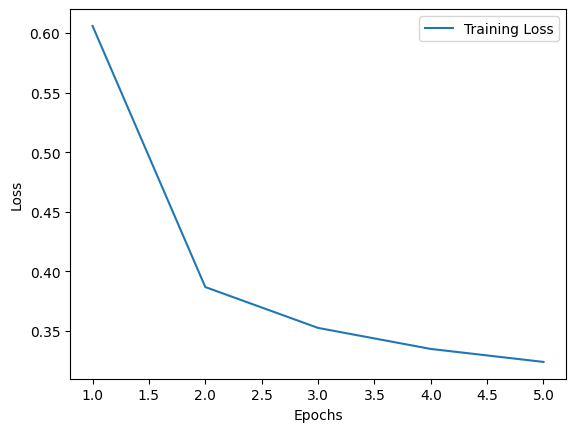

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 设置随机种子
torch.manual_seed(42)
np.random.seed(42)

# 加载MNIST数据集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# 创建数据加载器
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 定义简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc(x)
        return x

# 初始化模型、损失函数和优化器
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 5
train_losses = []  # 用于存储每个epoch的训练损失

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # 计算并存储每个epoch的平均训练损失
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# 展示训练过程中的损失曲线
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 超参数调优

随机森林有一些超参数需要调整，包括树的数量、深度、特征子集的大小等。想听一下，你这边有什么经验或技巧来进行超参数调优吗？

关于随机森林的超参数调优，我大概可以分享一些经验和技巧你可以作为参考~

首先，我们知道随机森林是一种集成学习方法，通过构建多个决策树来提高模型性能。

### 1. 网格搜索和随机搜索

使用网格搜索或随机搜索来搜索超参数的组合。这两种方法都是常用的超参数调优技术，可以帮助你在给定的超参数范围内寻找最优组合。网格搜索遍历所有可能的组合，而随机搜索则在给定的范围内随机选择组合。


### 2. 使用交叉验证(Cross-Validation)

通过交叉验证来评估不同超参数组合的性能，以确保模型的泛化能力。这有助于避免过拟合或欠拟合。

### 3. 特征重要性分析

查看每个特征在模型中的重要性，通过调整相关的超参数来优化模型

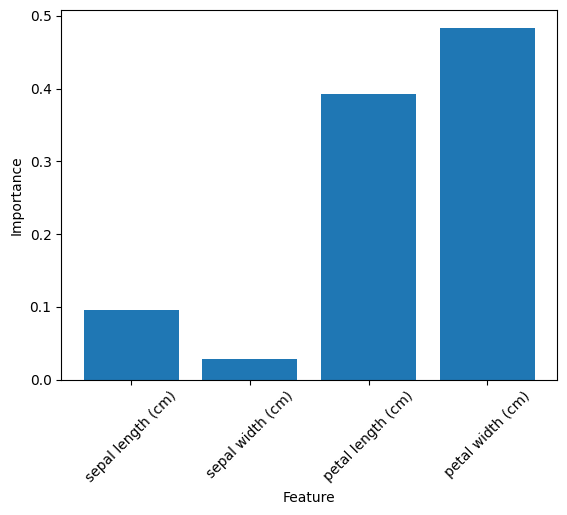

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


# 设置max_features为字符串，例如'sqrt'或'log2'
rf = RandomForestClassifier(max_features='sqrt')

# 训练模型
rf.fit(X_train, y_train)

# 获取特征重要性
feature_importances = rf.feature_importances_

# 获取特征名字
feature_names = iris.feature_names

# 可视化特征重要性
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

### 4. 集成学习方法

考虑使用集成学习中的方法，如自适应增强(AdaBoost)或梯度提升(Gradient Boosting)，它们可以进一步提高模型性能。

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


# 使用AdaBoost
ada_boost = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100,
                                   max_depth=10, max_features='auto'))
ada_boost.fit(X_train, y_train)

# 预测并计算准确率
y_pred_ada = ada_boost.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

# 使用Gradient Boosting
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features='auto')
grad_boost.fit(X_train, y_train)

# 预测并计算准确率
y_pred_grad = grad_boost.predict(X_test)
accuracy_grad = accuracy_score(y_test, y_pred_grad)
print("Gradient Boosting Accuracy:", accuracy_grad)



AdaBoost Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


## 处理缺失值


关于处理缺失值，我知道随机森林可以处理缺失值，但我不太清楚如何正确配置模型以处理数据中的缺失值，能帮我理一下吗？这几天还是模糊？



当使用随机森林处理缺失值时，有几种常见的方法可以考虑。

随机森林通常是一种强大的模型，能够在存在缺失值的数据集上表现良好。


1. 不处理缺失值： 随机森林对于缺失值具有鲁棒性，因此你可以选择不对缺失值进行任何处理，让模型自行处理。这是因为在构建每个决策树的过程中，随机森林使用了随机子集的特征，因此即使某些样本存在缺失值，其他决策树可能仍能利用其他特征进行预测。

2. 填充缺失值： 另一种常见的方法是在输入数据中填充缺失值。你可以使用均值、中位数、众数等统计量填充缺失值。这可以通过使用SimpleImputer类来实现，该类是scikit-learn库中的一部分。

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.datasets import make_classification

#---------------------------------------------------------------------
# https://blog.csdn.net/Leytton/article/details/127290793 sklearn 使用make_classification生成分类样本数据
#--------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=2, random_state=42)
# 假设 X 是你的特征数据，y 是目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用均值填充缺失值
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 构建随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# 预测并评估模型
y_pred = rf_model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.07646449999999999


3. 使用专门的缺失值指示器： 你还可以考虑将缺失值视为一个特殊的类别，并使用专门的缺失值指示器来指示每个样本中的缺失值情况。这可以通过MissingIndicator类来实现，该类同样是scikit-learn库的一部分。

In [22]:
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_pipeline
'''
# 使用缺失值指示器填充缺失值
pipeline = make_pipeline(
    MissingIndicator(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
'''

"\n# 使用缺失值指示器填充缺失值\npipeline = make_pipeline(\n    MissingIndicator(),\n    SimpleImputer(strategy='mean'),\n    RandomForestRegressor(n_estimators=100, random_state=42)\n)\n\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_test)\nmse = mean_squared_error(y_test, y_pred)\nprint(f'Mean Squared Error: {mse}')\n"